In [2]:
# usual imports
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Getting the data and do some cleanups

This data is taken from a Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance/data which is 'Medical Cost Personal Datasets' and columns are:

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

in this dataset what will do is to predict the 'charges' of using Linear Regression model.

##  Data Cleaning & Preprocessing:

Checked for missing values and there are no missing values on the dataset so we're good to go with that, next step was to check the categorical data and making that to and making them to numerical using Dictionary mapping and onehot encoding. Secondly I've tried to normalize the data using Nominal Distribution which doesn't seem to be giving perfect results but still let's proceed with the model and see how it works.



In [3]:
# load the data
csv_path = "insurance.csv"
df = pd.read_csv(csv_path)

In [4]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data Looks Okay with 1338 Entries with non null values.
- Age, Childrens, BMI & charges are Numerical.
- Sex, Smoker & Region looks like Categorical Data.

In [6]:
# checking summary of numerical values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

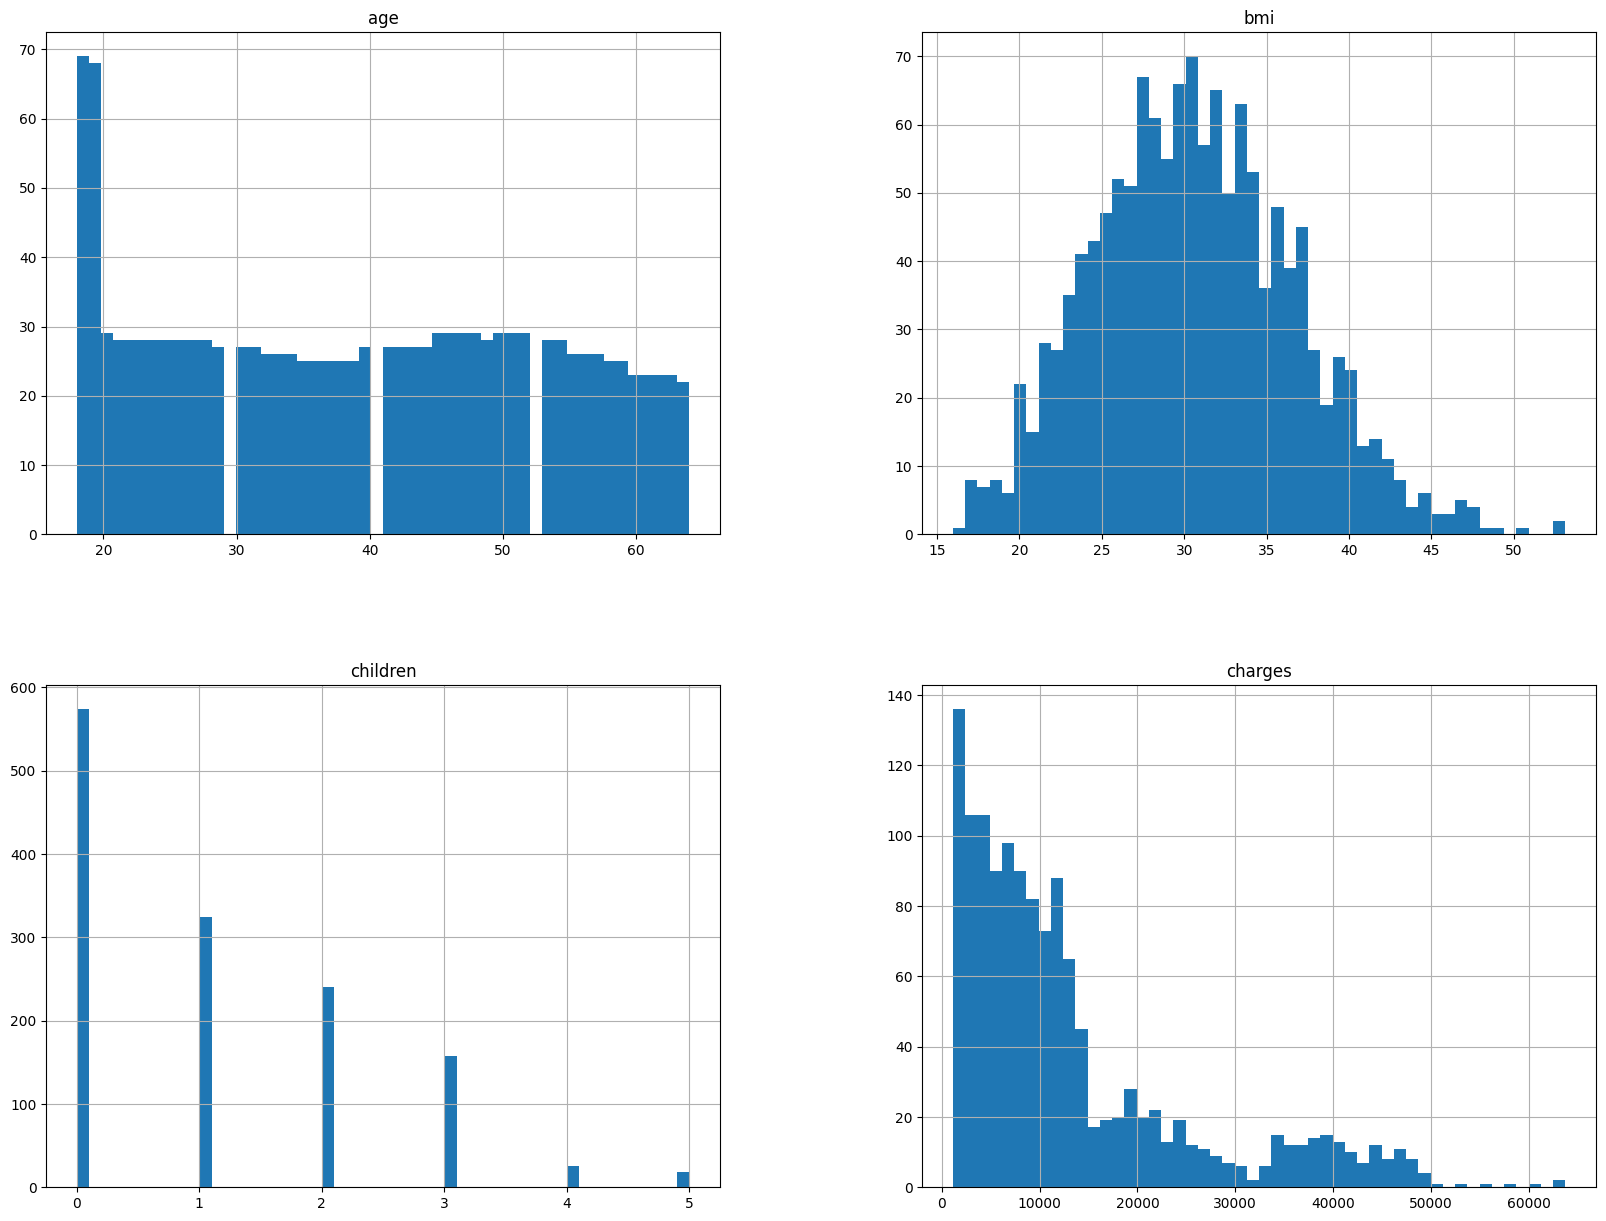

In [7]:
# checking distributtions of the datas.
df.hist(bins=50, figsize=(20,15))
plt.show

In [8]:
# Checking Categorical Data's
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [9]:
# Using Dictionary Mapping for the smoker and sex columns
df['smoker'] = df['smoker'].map({"yes":1, "no":0})
df['sex'] = df['sex'].map({"male":1, "female":0})


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [11]:
# importing OneHotEncoder for coverting the categorical values for regions.
from sklearn.preprocessing import OneHotEncoder
variables = ['region']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encodded= encoder.fit_transform(df[variables]).astype(int)
df= pd.concat([df, one_hot_encodded], axis=1).drop(columns=variables)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [12]:
df.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<Axes: xlabel='charges', ylabel='Count'>

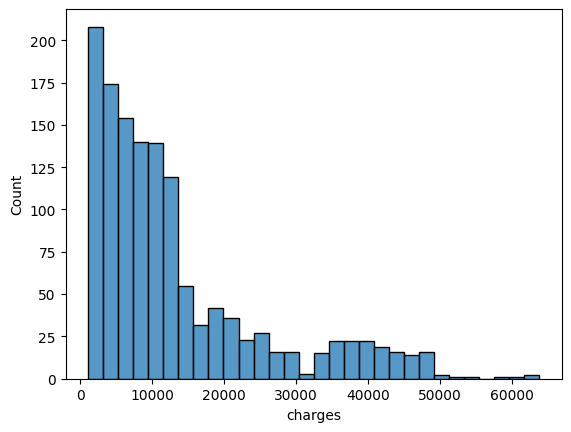

In [13]:
# checking distributtions of the prices.
sns.histplot(df['charges'])

In [14]:
# Will try to make the data closer to the Nominal Distrubutions now
df_cleaned = df.query("charges < charges.quantile(0.92)") 

<Axes: xlabel='charges', ylabel='Count'>

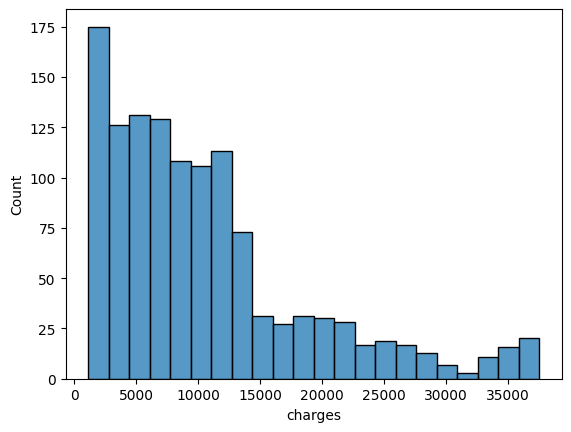

In [15]:
# checking distributtions of the prices.
sns.histplot(df_cleaned['charges'])

- Still it's not a good distriubtion it's rightly skewed need to find some alternative to make this as nominal distributions as possible.
- First let's check with a model and if needed we can find some alternatives.


In [16]:
# We've currently 1231 rows of datas
df_cleaned.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,38.707555,0.493095,30.179647,1.078798,0.135662,10607.179011,0.244517,0.250203,0.259139,0.246141
std,14.113037,0.500156,5.976567,1.214197,0.342569,8270.525331,0.429975,0.433306,0.438340,0.430937
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,25.840000,0.000000,0.000000,4451.932325,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,29.830000,1.000000,0.000000,8556.907000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,33.952500,2.000000,0.000000,13422.036750,0.000000,0.500000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,37484.449300,1.000000,1.000000,1.000000,1.000000


# EDA (Explotary Data Analysis) to Understand the Data

After checking with correlation and scatter plot seems like there is correlation with being smoker and age is factor to determine the value of 'Charges'. Which does also explains a bit with comparing this with real life analysis but let's proceed for the model now.

<Axes: >

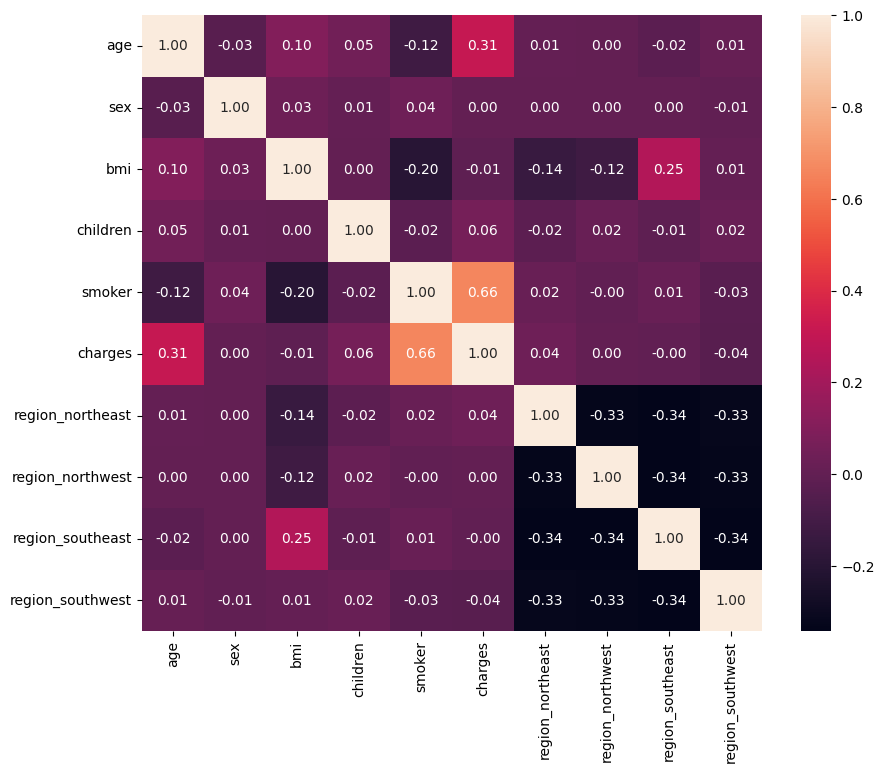

In [17]:
# Increase figure size
plt.figure(figsize=(10, 8))

# let's see the correlation matrix
# based on this, smoker is the most important support variable for charges.
correlations = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

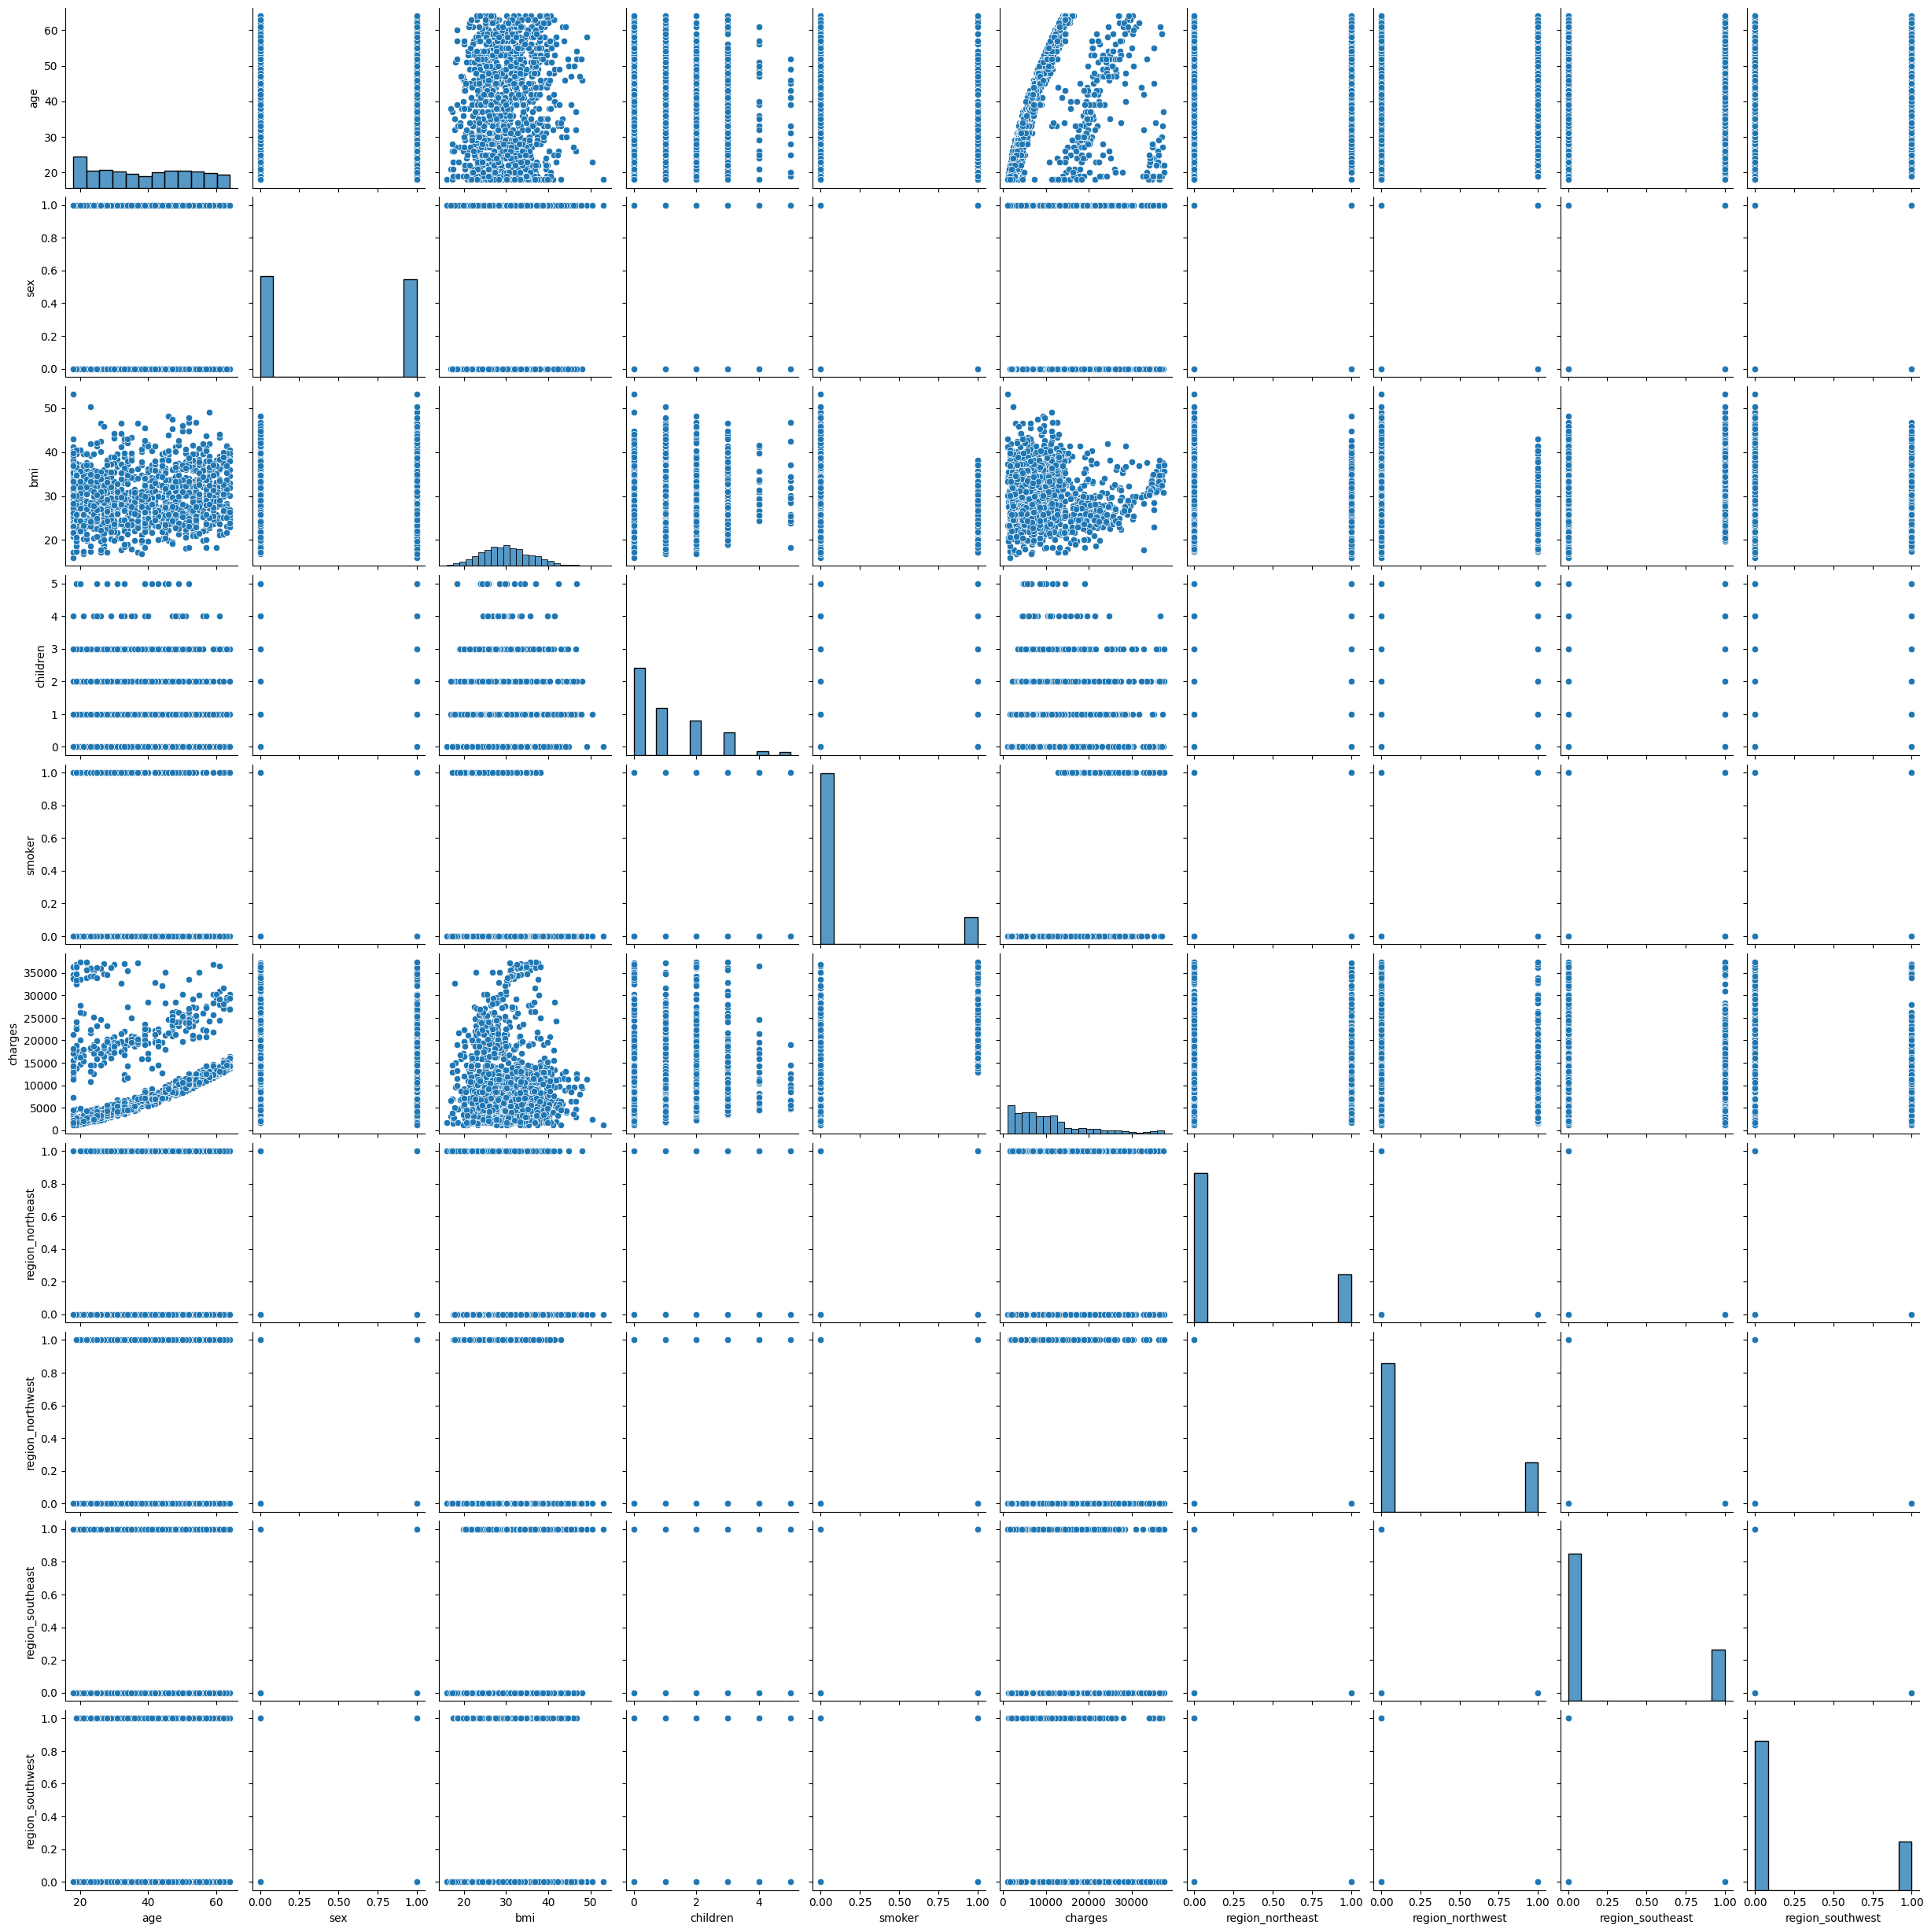

In [18]:
# analysing the data with a pairplot

sns.pairplot(df_cleaned, 
             kind='scatter')

# Linear Regression Model

X are the predictores, and y is the output here. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model. Also checking the variables with to look for optimal variables in dataset to reduce the amount of variables. But it looks like I can proceed with all the variables.



In [57]:
# First we do split between X and y.

X = df_cleaned.drop("charges", axis=1)

# our target variable is y
y = df_cleaned["charges"]

# Training Model Now

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train, y_train)


LinearRegression()

# Predicting Test Data

Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.


In [61]:
predictions = lm.predict(X_test)

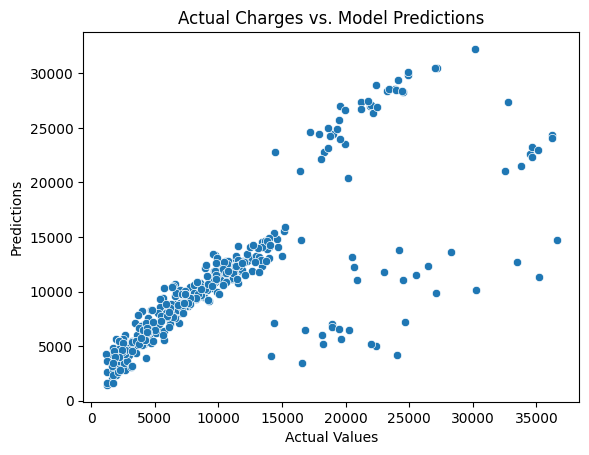

In [62]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.xlabel('Actual Values')
plt.title('Actual Charges vs. Model Predictions')
plt.show()

# Evaluation of the model

Model Performance Metrics:
- Mean Absolute Error (MAE): 3168.18
- Mean Squared Error (MSE): 25,742,397.19
- Root Mean Squared Error (RMSE): 5073.70
- R-Squared Score : 0.59

The linear regression model explains here is about 59% of the variation in insurance charges (R² = 0.608). Predictions are being offed by ~$3,168 on average (MAE), with larger errors averaging around $5,074 (RMSE). The model performs moderately well, with smoking status and age being the most influential predictors. I think we might need to run the model here with removing some variables


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [64]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('R-Squared:', r2_score(y_test, predictions))

Mean Absolute Error: 3168.1785573389457
Mean Squared Error: 25742397.18609607
Root Mean Squared Error: 5073.696599728453
R-Squared: 0.5875154333445267


In [65]:
residuals = y_test-predictions

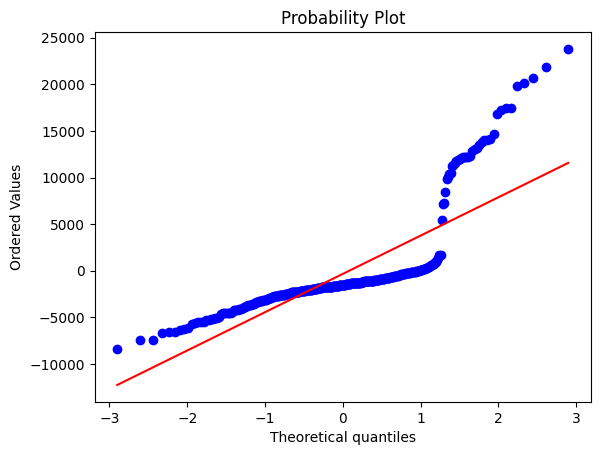

In [66]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [73]:
# Testing with new values
# let's try with some new imaginary data
tester_row = {"age": 20,"sex": 0, "bmi": 18.5, "children": 0, "smoker": 0, "region_northeast": 0,
     "region_northwest": 0, "region_southeast": 1, "region_southwest": 0}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

result = lm.predict(tester_row)[0]

print()
print(f"Predicted insurance charges for:")
print(f"Age: {tester_row['age'][0]}, BMI: {tester_row['bmi'][0]}, Smoker: No")
print(f"Predicted charges: {round(float(result), 2)} $")
print("----------------")


Predicted insurance charges for:
Age: 20, BMI: 18.5, Smoker: No
Predicted charges: 1655.06 $
----------------


Testing values does show a bit of expected values will try to do more with optimal variables

# Linear Regression Model with Optimal Variables

No luck with that as well model doesn't perform better, I think we need go with that here with considering all variables.

In [29]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


/Users/asksamar/Desktop/Introduction to Machine Learning Methods/Introduction-to-Machine-Learning-Methods-R504D123-3002/.venv/lib/python3.10/site-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

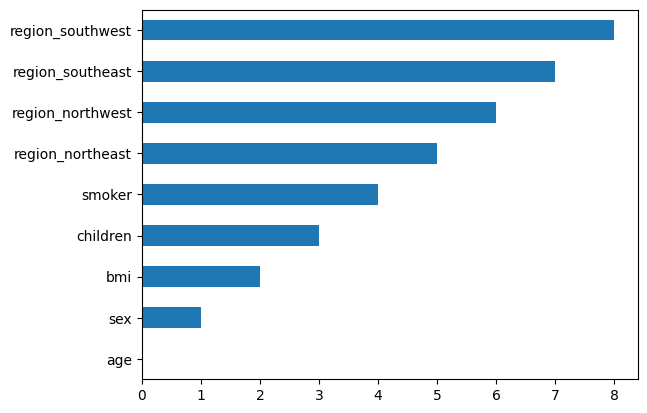

In [30]:
# Approach : Fischer's score
# pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

# how to interpret -> low score means the effect of this field is not large in the dataset
# => typically means other columns in the dataset have similar correlations, 
# therefore making this particular column not so useful since other columns 
# already fill this role for this correlation

# Fisher's score studies the variance of the data -> statistical significance

In [31]:
correlations = df_cleaned.corr()['charges'].sort_values(ascending=False)
print(correlations)


charges             1.000000
smoker              0.663434
age                 0.310529
children            0.058359
region_northeast    0.037372
region_northwest    0.001014
sex                 0.000272
region_southeast   -0.002107
bmi                -0.012756
region_southwest   -0.036165
Name: charges, dtype: float64


In [32]:
# removing regions and sex here doesn't seem to be useful for optimal model (With regions as well)
X = df_cleaned[['smoker', 'age', 'children', 'bmi']]
y = df_cleaned['charges']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = lm.predict(X_test)

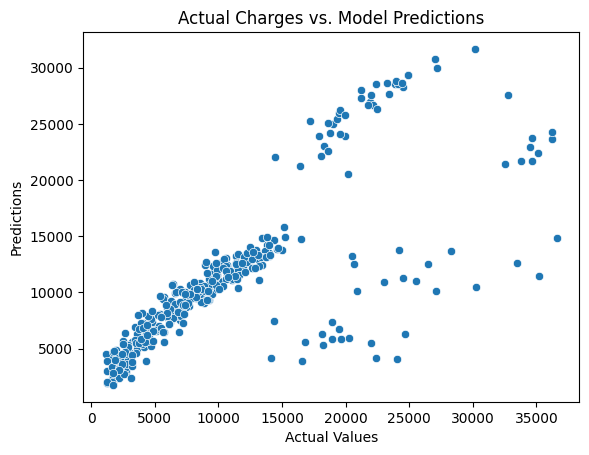

In [37]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.xlabel('Actual Values')
plt.title('Actual Charges vs. Model Predictions')
plt.show()

In [38]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('R-Squared:', r2_score(y_test, predictions))

Mean Absolute Error: 3126.1551657416508
Mean Squared Error: 25749812.700508792
Root Mean Squared Error: 5074.427327345303
R-Squared: 0.5873966104848316


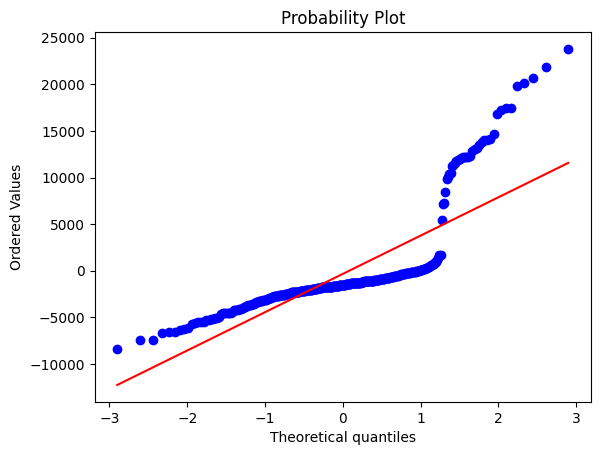

In [39]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# Personal Analysis

This model explained 69% of the variance with considerring all the variable model, showing moderate predictions here. It was simple to implement using basic Python libraries (pandas, sklearn etc.) and standard techniques. The model can help predict insurance costs and identify high-risk customer segments. I have done some more research on fine tune this model with more analysis here using some paramters and all and this guide may be useful here: https://medium.com/analytics-vidhya/how-to-improve-logistic-regression-b956e72f4492


# Advanced Tasks

## Polynomial Regression

Polynomial regression seems like performs better with R-squared error taking up from 60% to 75% here

In [40]:
# https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# split between X and y.
X = df_cleaned.drop("charges", axis=1)
y = df_cleaned["charges"]

In [42]:
# Train linear regression model on whole dataset
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [43]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y)

LinearRegression()

In [44]:
# Predict results
y_prediction_lm = lm.predict(X)           # Linear Regression
y_prediction_poly = lm_poly.predict(X_poly)  # Polynomial Regression

In [45]:
# Linear Regression
print('Mean Absolute Error:',mean_absolute_error(y, y_prediction_lm))
print('Mean Squared Error:',mean_squared_error(y, y_prediction_lm))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y, y_prediction_lm)))
print('R-Squared:', r2_score(y, y_prediction_lm))

Mean Absolute Error: 3148.660790457009
Mean Squared Error: 26701848.75862595
Root Mean Squared Error: 5167.383163519612
R-Squared: 0.6093137912012274


In [46]:
# Polynomial Regression
print('Mean Absolute Error:',mean_absolute_error(y, y_prediction_poly))
print('Mean Squared Error:',mean_squared_error(y, y_prediction_poly))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y, y_prediction_poly)))
print('R-Squared:', r2_score(y, y_prediction_poly))

Mean Absolute Error: 2383.9461343654866
Mean Squared Error: 16704461.969850603
Root Mean Squared Error: 4087.10924368931
R-Squared: 0.7555898478783819


## Polynomial Regression

https://www.geeksforgeeks.org/regression-using-catboost/

CatBoost can processs categorical variables here without the need for manual encoding, simplifying preprocessing steps. and I can directly run the main df here with some basic cleanups and now the R-Squared score is almost 86% here. 

In [47]:
# pip install catboost
from catboost import CatBoostRegressor


In [48]:
# Separate X and y here and also using the main df here with categorical values
X = df.drop("charges", axis=1)
y = df["charges"]

# taking categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [49]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)

# Train the model
model.fit(X_train, y_train, cat_features=categorical_features)

In [51]:
# Predict on the test set
predictions = model.predict(X_test)

In [52]:
# Linear Regression with CatBoostRegressor
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('R-Squared:', r2_score(y_test, predictions))

Mean Absolute Error: 2650.137228496923
Mean Squared Error: 21677747.16141475
Root Mean Squared Error: 4655.936765186438
R-Squared: 0.8603676374478884


# Regression Formula

In [53]:
# split between X and y.
X = df_cleaned.drop("charges", axis=1)
y = df_cleaned["charges"]


# Fit the model
model = LinearRegression()
model.fit(X, y)

# https://www.statology.org/sklearn-regression-coefficients/
# Getting intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
print(intercept, coefficients)

-5219.701191435821 [  225.50882189  -289.17945861   146.43501338   395.90812385
 17687.23327188   538.49605581   211.43965622  -411.93495234
  -338.00075968]


In [54]:
# Need the coefficient (features) column names
feature_names = X.columns

In [55]:
# Searching online to get some ways so that I can get the formula in this format for example: "Score = 70.483 + 5.795(hours) – 1.158(exams)"
# So tried my self with varius method and then taken help from ChatGPT to give me this following code to construct the formula which is the most efficient way here
# as it is uses python zip functions.
# ChatGPT Prompt: "how to build linear regression formula using python code in this format? example: 'Score = 70.483 + 5.795(hours) – 1.158(exams)' but with more than 4-5 features.""
# https://www.w3schools.com/python/ref_func_zip.asp

# Start with the intercept
formula = f"charges = {intercept:.2f}"

# Add each coefficient and corresponding feature
for coef, name in zip(coefficients, feature_names):
    formula += f" + ({coef:.2f} * {name})"

print(formula)

charges = -5219.70 + (225.51 * age) + (-289.18 * sex) + (146.44 * bmi) + (395.91 * children) + (17687.23 * smoker) + (538.50 * region_northeast) + (211.44 * region_northwest) + (-411.93 * region_southeast) + (-338.00 * region_southwest)


## Final Formula

$$
\text{charges} = -5219.70 + 225.51 \times \text{age} - 289.18 \times \text{sex} + 146.44 \times \text{bmi} + 395.91 \times \text{children} + 17687.23 \times \text{smoker} + 538.50 \times \text{region\_northeast} + 211.44 \times \text{region\_northwest} - 411.93 \times \text{region\_southeast} - 338.00 \times \text{region\_southwest}
$$


# Final Model + Web Application Implemention

I will use the Linear Regression Model here and save that in pickle model to run the flask webapp and predict values based on user input.

In [56]:
# https://docs.python.org/3/library/pickle.html#module-pickle
import pickle

# First we do split between X and y.
X = df_cleaned.drop("charges", axis=1)
# our target variable is y
y = df_cleaned["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)

# Save the trained model to a file
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lm, f)